In [283]:
all_possible_sizes = [
    '961x961',
    '1000x1000',
    '1059x1059',
    '1074x1074',
    '1080x1080',
    '4500x4500',
    '8032x8032',
    '9000x9000',
    '9506x9506',
    '9769x9769',
    '10000x10000',
    '10001x10001',
    '10605x10605',
    '20000x20000',
    '23670x23670',
    '25626x25626',
    '24696x24696',
    '25710x25710',
    '97569x97569',
    '97578x97578',
    '99340x99340',
    ]

SIZE = "10000x10000"  # this is the size for which we generate the final plot (= what we want from this notebook)

import pandas as pd
import os
import seaborn as sns

output_dir = "/scratch/eschreib/plots/plot_gen/eric_gen"

implementation_mappings = {
    'naive_SDDMM_GPU': 'sampled_cuBLAS',
    'semi_naive_CSR_SDDMM_GPU': 'naive_csr',
    'better_naive_CSR_SDDMM_GPU': 'dynamic_warp_CSR',
    'merged': 'tiled',
    'naive_coo_SDDMM_GPU': 'naive_coo',
    'coo_opt_vectorization_SDDMM_GPU': 'coo_vectorized',
    'coo_opt_loop_unrolled_SDDMM_GPU': 'coo_loop_unrolled',
    'cusparse_baseline': 'cuSPARSE_baseline'
}

In [284]:
# Choose which Datasets you want to be used in your plot
base_paths = [
    "/scratch/eschreib/correct_SDDMM_results/results_different_k_1k_10k_20k/",
    "/scratch/eschreib/correct_SDDMM_results/results_matrixmarket_different_k_10k/",
    "/scratch/eschreib/correct_SDDMM_results/results_matrixmarket_different_k_24k/",
    "/scratch/eschreib/correct_SDDMM_results/results_matrixmarket_different_k_100k/"
    ]

num_warmups = 20  # with the full data this should probably be something like 20


# Load Data


In [285]:
# create the dataframe to which we can append our sub-dataframes
data = pd.DataFrame()

for base_path in base_paths:
    # collect all files that contain run data
    file_paths = []
    impl_name = os.listdir(base_path)
    for impl in impl_name:
        sizes = os.listdir(base_path + impl)
        # there is exactly one csv file per size_dir
        for size_dir in sizes:
            files = os.listdir(base_path + impl + "/" + size_dir)
            for i in range(len(files)):
                if files[i].endswith(".csv"):
                    file_paths.append(base_path + impl + "/" + size_dir + "/" + files[i])
    sub_data = []
    for file in file_paths:
        with open(file, 'r') as fin:
            size = file.split("/")[-2]
            lines = fin.readlines()
            lines.pop(0)  # remove header line
            lines = list(map(lambda x: x.replace(",\n", ""), lines))  # remove trailing newline since they would create an extra column at the end
            lines = list(map(lambda x: x.split(","), lines))  # split into columns
            lines = list(map(lambda x: [x[0]] + ["0." + (x[3].split("/")[-1].split(".")[0].split("_")[-1][1:])] + x[1:], lines))
            lines = list(map(lambda x: [x[0]] + [size] + x[1:], lines))  # add size info
            # grab k from filepath of A
            lines = list(map(lambda line: line[0:3] + [line[3].split("/")[6].split("_")[3]] + line[3:], lines))
            sub_data += lines
    # make a subdata dataframe and add an indicator if we want it to be in the special configurations plot
    special_config = base_path != "/scratch/eschreib/results_full_run/"
        
    sub_data = pd.DataFrame(sub_data)
    sub_data["special_config"] = special_config
    # add the subdata to our main big dataframe
    data = pd.concat([data, sub_data], axis=0)

data

,0,1,2,3,4,5,6,7,8,9,...,218,219,220,221,222,223,224,225,226,special_config
0,semi_naive_CSR_SDDMM_GPU,1000x1000,0.01,1000,/scratch/eschreib/matrices/Dataset_generated_m...,/scratch/eschreib/matrices/Dataset_generated_m...,/scratch/eschreib/matrices/Dataset_generated_m...,95232.002437,81919.997931,81919.997931,...,80895.997584,81919.997931,81919.997931,81919.997931,81919.997931,80895.997584,80895.997584,80895.997584,81919.997931,True
1,semi_naive_CSR_SDDMM_GPU,1000x1000,0.005,1000,/scratch/eschreib/matrices/Dataset_generated_m...,/scratch/eschreib/matrices/Dataset_generated_m...,/scratch/eschreib/matrices/Dataset_generated_m...,61439.998448,47104.001045,48128.001392,...,47104.001045,48128.001392,46080.000699,46080.000699,47104.001045,47104.001045,46080.000699,47104.001045,46080.000699,True
2,semi_naive_CSR_SDDMM_GPU,1000x1000,0.001,1000,/scratch/eschreib/matrices/Dataset_generated_m...,/scratch/eschreib/matrices/Dataset_generated_m...,/scratch/eschreib/matrices/Dataset_generated_m...,34816.000611,19455.999136,19455.999136,...,18432.000652,18432.000652,17408.000305,17408.000305,17408.000305,18432.000652,17408.000305,17408.000305,17408.000305,True
3,semi_naive_CSR_SDDMM_GPU,1000x1000,0.0005,1000,/scratch/eschreib/matrices/Dataset_generated_m...,/scratch/eschreib/matrices/Dataset_generated_m...,/scratch/eschreib/matrices/Dataset_generated_m...,28672.000393,13311.999850,13311.999850,...,13311.999850,13311.999850,13311.999850,13311.999850,13311.999850,12288.000435,12288.000435,13311.999850,13311.999850,True
4,semi_naive_CSR_SDDMM_GPU,1000x1000,0.0001,1000,/scratch/eschreib/matrices/Dataset_generated_m...,/scratch/eschreib/matrices/Dataset_generated_m...,/scratch/eschreib/matrices/Dataset_generated_m...,23552.000523,11264.000088,10239.999741,...,10239.999741,11264.000088,10239.999741,11264.000088,10239.999741,10239.999741,10239.999741,10239.999741,10239.999741,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
93,sml2_paper,97569x97569,0.0005,100,/scratch/eschreib/matrices/Dataset_generated_m...,/scratch/eschreib/matrices/Dataset_generated_m...,/scratch/eschreib/matrix_market_matrices/Si34H...,322560.012341,275456.011295,274432.003498,...,429055.988789,273407.995701,278528.004885,274432.003498,291839.987040,272383.987904,271360.009909,270336.002111,1241088.032722,True
94,** Function did not pass the test ** sml2_paper,97569x97569,0.0005,100,/scratch/eschreib/matrices/Dataset_generated_m...,/scratch/eschreib/matrices/Dataset_generated_m...,/scratch/eschreib/matrix_market_matrices/Si34H...,None,None,None,...,None,None,None,None,None,None,None,None,None,True
95,** Function did not pass the test ** sml2_paper,97569x97569,0.0005,500,/scratch/eschreib/matrices/Dataset_generated_m...,/scratch/eschreib/matrices/Dataset_generated_m...,/scratch/eschreib/matrix_market_matrices/Si34H...,None,None,None,...,None,None,None,None,None,None,None,None,None,True
96,sml2_paper,97569x97569,0.0005,500,/scratch/eschreib/matrices/Dataset_generated_m...,/scratch/eschreib/matrices/Dataset_generated_m...,/scratch/eschreib/matrix_market_matrices/Si34H...,1185791.969299,1135615.944862,1127424.001694,...,1227776.050568,1078271.985054,1078271.985054,1083392.024040,1087488.055229,1080320.000648,1079295.992851,1080320.000648,1999871.969223,True


## Lucas Preprocessing

In [286]:
### Lucas' preprocessing code
# A helper function to turn the densities int percentages
def to_percent (a):
    # remove 3 characters
    a = a[3:]
    # We assume that we never have more than 9._%
    before_comma = a[0]
    a = a[1:]
    if a == "":
        a = before_comma + "%"
    else:
        a = before_comma + "." + a + "%"

    return a
    
# remove all the broken runs (= the impls that start with "**")
data = data[~data[0].str.startswith("**")]

# prettify df
data = data.drop(data.columns[[4, 5, 6]], axis=1)  # rm the paths to the matrices
data = data.sort_values(by=[0])  # sort by implementation name

# remove warmup measurements
metadata = data.iloc[:, :4]
measurements = data.iloc[:, 4:]
measurements = measurements.iloc[:, num_warmups:]
data = pd.concat([metadata, measurements], axis=1)

data.columns = range(data.shape[1])  # reset the column names to consecutive numbers

# remove all k = 10k runs
data = data[data[3] != "10000"]

# better names
# iterate over rows
for i in range(data.shape[0]):
    # get curr row
    row = data.iloc[i]
    if row[0] in implementation_mappings:
        data.iloc[i, 0] = implementation_mappings[row[0]]

data

,0,1,2,3,4,5,6,7,8,9,...,195,196,197,198,199,200,201,202,203,204
50,dynamic_warp_CSR,20000x20000,0.0001,100,43007.999659,43007.999659,43007.999659,41983.999312,43007.999659,41983.999312,...,43007.999659,43007.999659,43007.999659,41983.999312,43007.999659,41983.999312,43007.999659,41983.999312,41983.999312,True
179,dynamic_warp_CSR,10000x10000,0.00001,500,21503.999829,21503.999829,21503.999829,21503.999829,21503.999829,21471.999586,...,21503.999829,21503.999829,21503.999829,21503.999829,22528.000176,22528.000176,21503.999829,21503.999829,21503.999829,True
180,dynamic_warp_CSR,10000x10000,0.01,1000,4877312.183380,4894720.077515,4898816.108704,4891647.815704,4887551.784515,4893695.831299,...,4898816.108704,4878335.952759,4899839.878082,4895743.846893,4889599.800110,4874239.921570,4884479.999542,4900864.124298,4888576.030731,True
181,dynamic_warp_CSR,10000x10000,0.005,1000,2562047.958374,2568192.005157,2576384.067535,2565119.981766,2579456.090927,2575360.059738,...,2569216.012955,2557951.927185,2576384.067535,2577408.075333,2561023.950577,2566143.989563,2581504.106522,2582528.114319,2567167.997360,True
182,dynamic_warp_CSR,10000x10000,0.001,1000,575487.971306,580608.010292,579584.002495,586751.997471,574464.023113,580608.010292,...,578559.994698,578559.994698,579584.002495,581632.018089,575487.971306,574464.023113,583679.974079,574464.023113,574464.023113,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,sml2_paper,1000x1000,0.001,1000,245759.993792,267264.008522,247807.994485,246784.001589,248832.002282,248832.002282,...,246784.001589,244736.000896,265215.992928,247807.994485,245759.993792,247807.994485,247807.994485,246784.001589,245759.993792,True
511,sml2_paper,1000x1000,0.005,1000,245759.993792,244736.000896,246784.001589,245759.993792,245759.993792,246784.001589,...,247807.994485,246784.001589,245759.993792,246784.001589,247807.994485,244736.000896,245759.993792,1215487.957001,248832.002282,True
510,sml2_paper,1000x1000,0.01,1000,248832.002282,248832.002282,247807.994485,402431.994677,250880.002975,247807.994485,...,249855.995178,248832.002282,250880.002975,246784.001589,1091583.967209,246784.001589,246784.001589,247807.994485,246784.001589,True
532,sml2_paper,10000x10000,0.0001,50,31743.999571,29696.000740,30719.999224,30719.999224,30719.999224,29696.000740,...,163839.995861,31743.999571,30719.999224,29696.000740,29696.000740,30719.999224,30719.999224,30719.999224,37856.001407,True


# Eric's Preprocessing

In [287]:
# Drop the last col as it is an indicator for special configs
data = data.drop(data.columns[-1], axis=1)
# Convert all times to float
data.iloc[:, 4:] = data.iloc[:, 4:].astype(float)
# Pivot the runtimes from index 4 onwards to rows
data = data.melt(id_vars=data.columns[:4], var_name="run", value_name="runtime")
# drop the col run
data = data.drop(data.columns[4], axis=1)
data

,0,1,2,3,runtime
0,dynamic_warp_CSR,20000x20000,0.0001,100,43007.999659
1,dynamic_warp_CSR,10000x10000,0.00001,500,21503.999829
2,dynamic_warp_CSR,10000x10000,0.01,1000,4877312.18338
3,dynamic_warp_CSR,10000x10000,0.005,1000,2562047.958374
4,dynamic_warp_CSR,10000x10000,0.001,1000,575487.971306
...,...,...,...,...,...
187995,sml2_paper,1000x1000,0.001,1000,245759.993792
187996,sml2_paper,1000x1000,0.005,1000,248832.002282
187997,sml2_paper,1000x1000,0.01,1000,246784.001589
187998,sml2_paper,10000x10000,0.0001,50,37856.001407


# Slice

### Take all 10kx10k matrices and plot 3D The average times for each alg

In [14]:
# take all algs
algs = data[0].unique()
times = [] # Alg, size, density, k, mean_time
# for each alg take all runs with size 10000x10000 and make the mean
for alg in algs:
    alg_data = data[data[0] == alg]
    alg_data = alg_data[alg_data[1] == "10000x10000"]
    alg_data = alg_data.groupby([0, 1, 2, 3]).mean()
    alg_data = alg_data.reset_index()
    for i in range(alg_data.shape[0]):
        times.append([alg_data.iloc[i, 0], alg_data.iloc[i, 1], alg_data.iloc[i, 2], alg_data.iloc[i, 3], alg_data.iloc[i, 4]])

for time in times:
    time[1] = int(time[1].split("x")[0])
    time[2] = to_percent(time[2])
    time[3] = int(time[3])
    time[4] = time[4] / 1000 # convert to ms


times = pd.DataFrame(times)
times.columns = ["alg", "size", "density", "k", "time"]
times

,alg,size,density,k,time
0,dynamic_warp_CSR,10000,0.001%,100,14.248960
1,dynamic_warp_CSR,10000,0.001%,1000,32.855040
2,dynamic_warp_CSR,10000,0.001%,50,14.069760
3,dynamic_warp_CSR,10000,0.001%,500,21.764960
4,dynamic_warp_CSR,10000,0.01%,100,20.321279
...,...,...,...,...,...
187,sml2_paper,10000,0.5%,500,215.546881
188,sml2_paper,10000,1%,100,67.444641
189,sml2_paper,10000,1%,1000,412.482882
190,sml2_paper,10000,1%,50,51.076800


In [15]:


# for each density and k keep the alg with the lowest runtime
best_algs = []
for k in times["k"].unique():
    for density in times["density"].unique():
        sub_data = times[times["k"] == k]
        sub_data = sub_data[sub_data["density"] == density]
        best_alg = sub_data[sub_data["time"] == sub_data["time"].min()]
        best_algs.append(best_alg)

best_algs = pd.concat(best_algs, axis=0)
best_algs = best_algs.reset_index()
best_algs = best_algs.drop(best_algs.columns[0], axis=1)
best_algs

,alg,size,density,k,time
0,dynamic_warp_CSR,10000,0.001%,100,14.248960
1,dynamic_warp_CSR,10000,0.01%,100,20.321279
2,dynamic_warp_CSR,10000,0.05%,100,33.300480
3,dynamic_warp_CSR,10000,0.1%,100,59.264001
4,sml2_paper,10000,0.5%,100,77.116001
5,sml2_paper,10000,1%,100,67.444641
6,dynamic_warp_CSR,10000,0.001%,1000,32.855040
7,dynamic_warp_CSR,10000,0.01%,1000,117.232642
8,dynamic_warp_CSR,10000,0.05%,1000,310.109599
9,sml2_paper,10000,0.1%,1000,378.393599


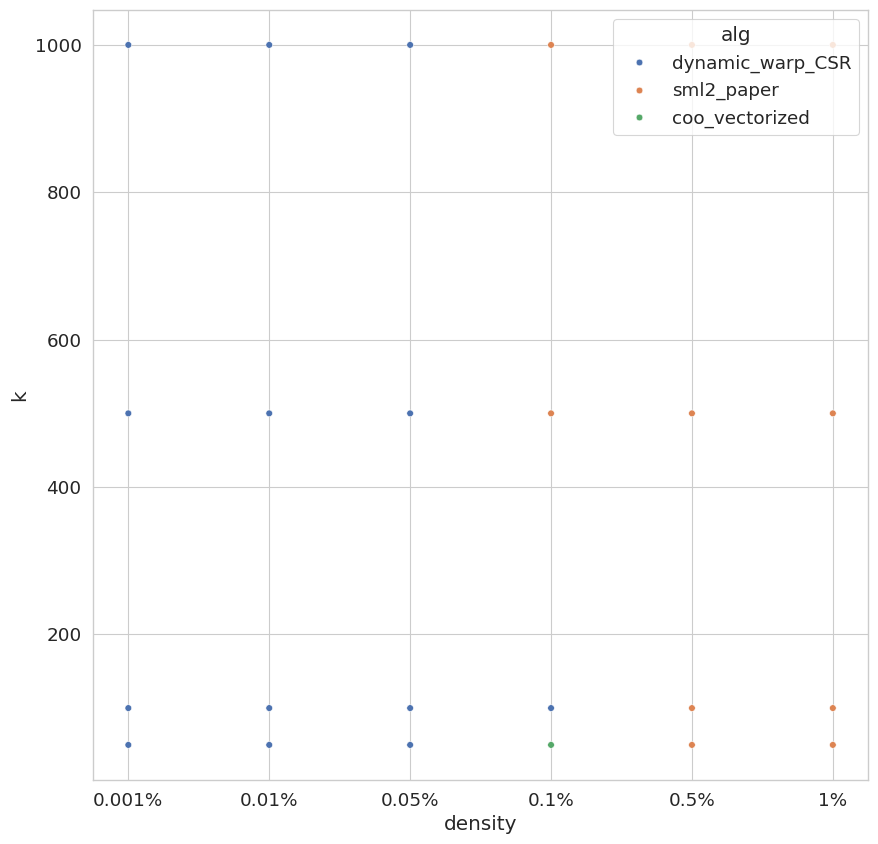

In [16]:


import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="whitegrid")
sns.set_context("paper", font_scale=1.5)

# plot a point in a 2d grid size vs density
fig = plt.figure(figsize=(10, 10))
ax = sns.scatterplot(data=best_algs, x="density", y="k", hue="alg")
ax.set(xlabel="density", ylabel="k")
plt.show()


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


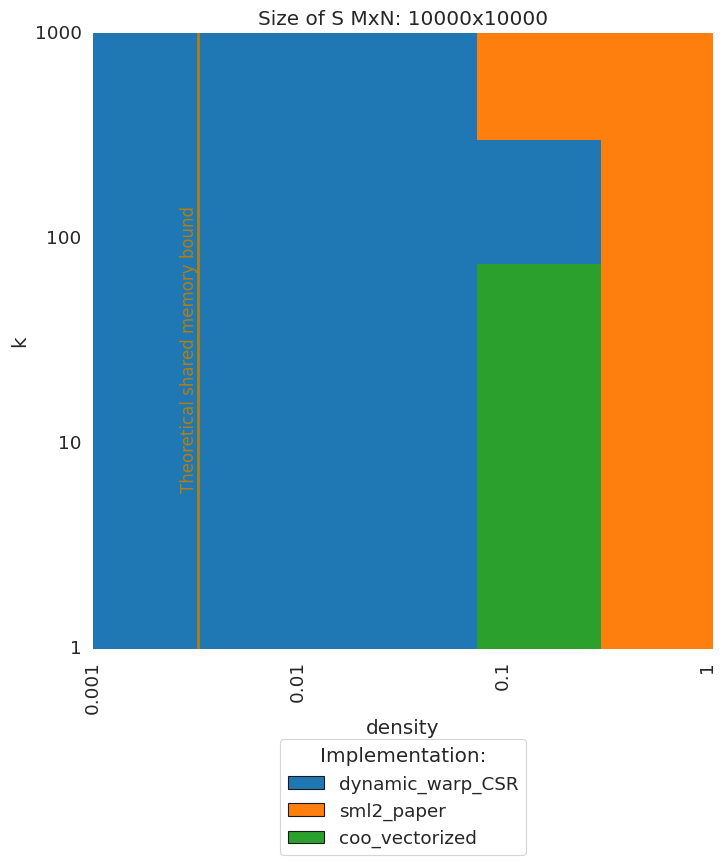

In [17]:
# Interpolate the data to get a smooth surface
from scipy.interpolate import griddata
import numpy as np





num_unique_best_algos = len(best_algs["alg"].unique())
colors = ["#1f77b4", "#ff7f0e", "#2ca02c", "#d62728", "#9467bd"]

# create a grid of size vs density
# x = np.linspace(0.001, 1, 100)
# y = np.linspace(1, 10000, 1000)
x = np.logspace(-3, 0, 100)
y = np.logspace(0, 3, 1000)
X, Y = np.meshgrid(x, y)

# interpolate the data
Z = griddata((best_algs["density"].str.split("%").str[0].astype(float), best_algs["k"]), best_algs["alg"], (X, Y), method='nearest')

# Make a dictionary to map alg names to numbers
alg_to_num = {}
num_to_alg = {}
eps = 0.0001
for i, alg in enumerate(best_algs["alg"].unique()):
    alg_to_num[alg] = i
    num_to_alg[i] = alg

# map the alg names to numbers in Z
for i in range(Z.shape[0]):
    for j in range(Z.shape[1]):
        Z[i][j] = float(alg_to_num[Z[i][j]])

Z_pd = pd.DataFrame(Z)
Z_pd.columns = x
Z_pd.index = y
Z_pd = Z_pd.reset_index()
Z_pd = Z_pd.melt(id_vars="index", var_name="density", value_name="alg")
Z_pd["alg"] = Z_pd["alg"].astype(int)
Z_pd["density"] = Z_pd["density"].astype(float)

import seaborn as sns



# Create a pivot table for the heatmap
pivot_table = Z_pd.pivot(index='index', columns='density', values='alg')

# Create the heatmap
fig = plt.figure(figsize=(8, 8))
# colors = blue and orange, few ticks on the axes
ax = sns.heatmap(pivot_table, cmap=colors[0:num_unique_best_algos])
ax.set_xticks([0, 33, 66, 99])
ax.set_xticklabels([0.001, 0.01, 0.1, 1])
ax.set_yticks([0, 333, 666, 999])
ax.set_yticklabels([1, 10, 100, 1000])

shared_mem_color = '#b37f0e'

# ax.plot(0.005, 1, 'b-', linewidth=2, label='theoretical shared memory bound')
ax.axvline(x=17, color=shared_mem_color, linestyle='-', linewidth = 2, label='theoretical shared memory bound')
ax.text(14,  260, 'Theoretical shared memory bound', color = shared_mem_color, fontsize=12, rotation=90)


# flip plot horizontally
ax.invert_yaxis()

# custom legend
from matplotlib.patches import Patch
legend_elements = [Patch(facecolor=colors[i], edgecolor='k', label=num_to_alg[i]) for i in range(num_unique_best_algos)]
                    
legend = ax.legend(handles=legend_elements, loc='lower center', bbox_to_anchor=(0.5, -0.35))
legend.set_title("Implementation:")
ax.set_ylabel("k")

# hide colorbar
ax.collections[0].colorbar.remove()

# add title
ax.set_title("Size of S MxN: " + SIZE)

# save plot with leegnd
plt.savefig("/scratch/eschreib/boundary_plots/" + SIZE + ".png", bbox_inches='tight')

plt.savefig("/scratch/eschreib/boundary_plots/" + SIZE + ".eps", bbox_inches='tight')

# Slice for K = 100

In [288]:
# take all algs
algs = data[0].unique()
times = [] # Alg, size, density, k, mean_time
# for each alg take all runs with k = 100 and make the mean
for alg in algs:
    alg_data = data[data[0] == alg]
    alg_data = alg_data[alg_data[3] == "500"]
    alg_data = alg_data.groupby([0, 1, 2, 3]).mean()
    alg_data = alg_data.reset_index()
    for i in range(alg_data.shape[0]):
        times.append([alg_data.iloc[i, 0], alg_data.iloc[i, 1], alg_data.iloc[i, 2], alg_data.iloc[i, 3], alg_data.iloc[i, 4]])

for time in times:
    time[1] = int(time[1].split("x")[0])
    time[2] = to_percent(time[2])
    time[3] = int(time[3])
    time[4] = time[4] / 1000 # convert to ms


times = pd.DataFrame(times)
times.columns = ["alg", "size", "density", "k", "time"]
times

,alg,size,density,k,time
0,dynamic_warp_CSR,100000,0.002%,500,846.356481
1,dynamic_warp_CSR,100000,0.01%,500,3145.963539
2,dynamic_warp_CSR,10000,0.001%,500,21.764960
3,dynamic_warp_CSR,10000,0.01%,500,64.952640
4,dynamic_warp_CSR,10000,0.05%,500,151.639042
...,...,...,...,...,...
226,sml2_paper,9506,0.5%,500,223.083518
227,sml2_paper,97569,0.05%,500,1180.026246
228,sml2_paper,97578,0.1%,500,894.402559
229,sml2_paper,9769,0.1%,500,208.189439


In [289]:
# for each density and size keep the alg with the lowest runtime
best_algs = []
for size in times["size"].unique():
    for density in times["density"].unique():
        sub_data = times[times["size"] == size]
        sub_data = sub_data[sub_data["density"] == density]
        best_alg = sub_data[sub_data["time"] == sub_data["time"].min()]
        best_algs.append(best_alg)

best_algs = pd.concat(best_algs, axis=0)
best_algs = best_algs.reset_index()
best_algs = best_algs.drop(best_algs.columns[0], axis=1)

# add a column that indicates if the alg is from matrix market or generated
# matrices with sizes divisible by 100 are generated
best_algs["matrix market"] = best_algs["size"] % 100 != 0
# the only exception is the one with size 10001
best_algs.loc[best_algs["size"] == 10001, "matrix market"] = False

best_algs

,alg,size,density,k,time,matrix market
0,dynamic_warp_CSR,100000,0.002%,500,846.356481,False
1,sml2_paper,100000,0.01%,500,1567.257441,False
2,dynamic_warp_CSR,10000,0.01%,500,64.952640,False
3,dynamic_warp_CSR,10000,0.001%,500,21.764960,False
4,dynamic_warp_CSR,10000,0.05%,500,151.639042,False
5,sml2_paper,10000,0.1%,500,215.674881,False
6,sml2_paper,10000,0.5%,500,215.546881,False
7,sml2_paper,10000,1%,500,235.944158,False
8,dynamic_warp_CSR,10001,0.05%,500,107.443199,False
9,naive_csr,1000,0.01%,500,10.291200,False


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


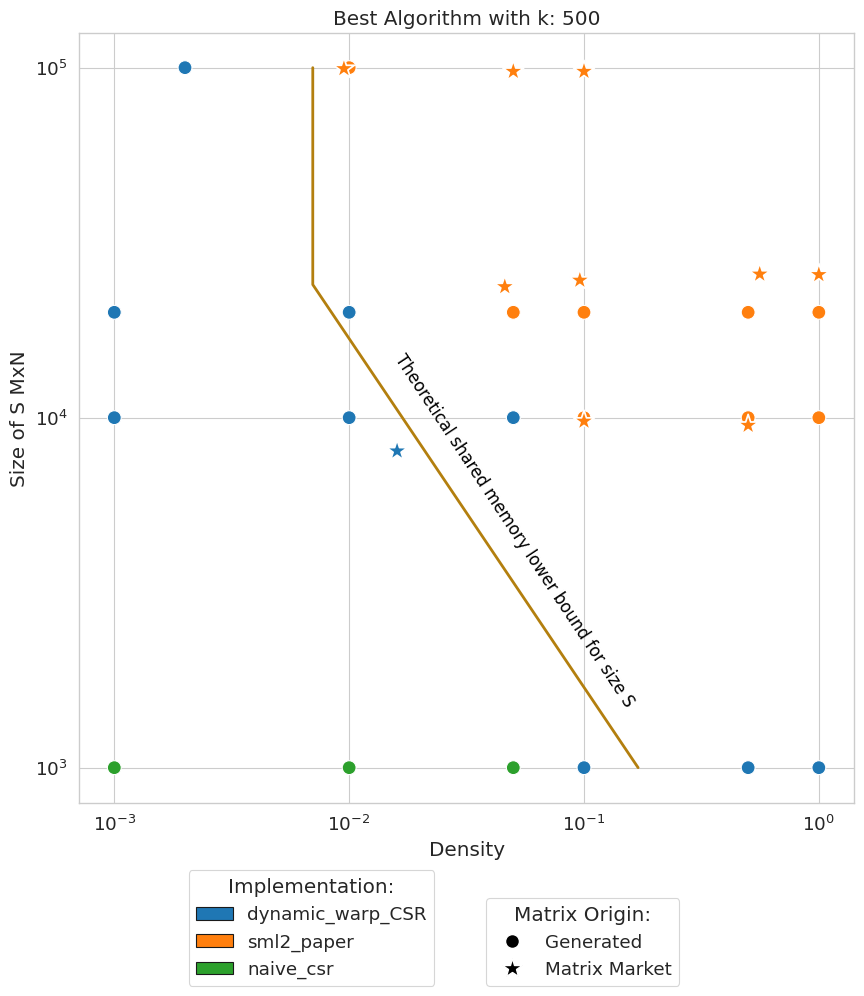

In [339]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="whitegrid")
sns.set_context("paper", font_scale=1.5)

best_alg_for_plotting = best_algs.copy()
best_alg_for_plotting["density"] = best_alg_for_plotting["density"].str.split("%").str[0].astype(float)

# plot a point in a 2d grid size vs density
fig = plt.figure(figsize=(10, 10))
#  increase marker size but only of the stars
colors_plt = {
    'sml2_paper': "#ff7f0e",
    'naive_csr': "#2ca02c",
    'dynamic_warp_CSR': "#1f77b4",
}
colors = ["#1f77b4", "#ff7f0e", "#2ca02c", "#d62728", "#9467bd"]

ax = sns.scatterplot(data=best_alg_for_plotting[best_alg_for_plotting["matrix market"]==False], x="density", y="size", hue="alg", s=100, style="matrix market", markers={True: "*", False: "o"}, palette=colors_plt)
ax = sns.scatterplot(data=best_alg_for_plotting[best_alg_for_plotting["matrix market"]==True], x="density", y="size", hue="alg", s=250, style="matrix market", markers={True: "*", False: "o"}, palette=colors_plt)

ax.set(xlabel="Density", ylabel="Size of S MxN")
ax.plot([0.007, 0.007, 0.17], [100000, 24000, 1000],  color=shared_mem_color, linewidth=2, label='theoretical shared memory bound for Size S')
ax.text(0.015,  1500, 'Theoretical shared memory lower bound for size S', color = "black", fontsize=12, rotation=-56.5)


# custom legend with two columns one for algs and one for matrix market
from matplotlib.patches import Patch
from matplotlib.markers import MarkerStyle
from matplotlib.lines import Line2D
legend_elements = [Patch(facecolor=colors[i], edgecolor='k', label=num_to_alg[i]) for i in range(num_unique_best_algos)]
legend = ax.legend(handles=legend_elements, loc='lower center', bbox_to_anchor=(0.3, -0.25))
legend.set_title("Implementation:")

# make a legend of the style of the points
# stars for matrix market and circles for generated matrices
legend_2_elements = [(Line2D([0], [0], marker='o', color='w', label='Generated', markerfacecolor='black', markersize=10)),(Line2D([0], [0], marker='*', color='w', label='Matrix Market', markerfacecolor='black', markersize=15))]
legend_2 = ax.legend(handles=legend_2_elements, loc='lower center', bbox_to_anchor=(0.65, -0.25))
legend_2.set_title("Matrix Origin:")
plt.gca().add_artist(legend)

# add title
ax.set_title("Best Algorithm with k: 500")

ax.set_xscale('log')
ax.set_yscale('log')
plt.savefig("/scratch/eschreib/boundary_plots/K_100" + ".png", bbox_inches='tight')

plt.savefig("/scratch/eschreib/boundary_plots/K_100" + ".eps", bbox_inches='tight')
# plt.show()


In [249]:
# For plotting / interpolation reasons I add a point at 0.001% density, size 75000x75000 for dynamic warp CSR
# Before interpolation set the points on a straight line for the theoretical shared memory bound
# density_csr_end = 0.002
# density_csr_start = 0.01
# density_sm_end = 0.01
# density_sm_start = 0.048

# size_start = 20000
# size_end = 100000

# # Line between start and end
# slope_csr_in_log_space = np.log10(density_csr_end) - np.log10(density_csr_start)
# slope_sm_in_log_space = np.log10(density_sm_end) - np.log10(density_sm_start)

# # add 15 points on the lines 
# for i in range(15):
#     size = 10 ** (np.log10(size_start) + (np.log10(size_end) - np.log10(size_start)) / 15 * i)  
#     best_algs = pd.concat([best_algs, pd.DataFrame([["dynamic_warp_CSR", size, f"{density_csr_start}%", 500, 0.0]], columns=best_algs.columns)], axis=0)
#     best_algs = pd.concat([best_algs, pd.DataFrame([["sml2_paper", size, f"{density_sm_start}%", 500, 0.0]], columns=best_algs.columns)], axis=0)
#     density_csr_start = 10 ** (np.log10(density_csr_start) + slope_csr_in_log_space / 15)
#     density_sm_start = 10 ** (np.log10(density_sm_start) + slope_sm_in_log_space / 15)
    
# # set a point at 99000x99000, 0.001% for dynamic warp CSR
# best_algs = pd.concat([best_algs, pd.DataFrame([["dynamic_warp_CSR", 99000, "0.002%", 500, 0.0]], columns=best_algs.columns)], axis=0)
# best_algs = pd.concat([best_algs, pd.DataFrame([["sml2_paper", 99000, "0.009%", 500, 0.0]], columns=best_algs.columns)], axis=0)

In [250]:
# Interpolate the data to get a smooth surface
from scipy.interpolate import griddata
import numpy as np





num_unique_best_algos = len(best_algs["alg"].unique())
colors = ["#1f77b4", "#ff7f0e", "#2ca02c", "#d62728", "#9467bd"]

# create a grid of size vs density
# x = np.linspace(0.001, 1, 100)
# y = np.linspace(1000, 100000, 1000)
# x = np.logspace(-3, 0, 100)
x = np.logspace(2, 5, 100)
y = np.logspace(3, 5, 1000)
X, Y = np.meshgrid(x, y)

# interpolate the data
Z = griddata((best_algs["density"].str.split("%").str[0].astype(float)*10**5, best_algs["size"]), best_algs["alg"], (X, Y), method='nearest')

# Make a dictionary to map alg names to numbers
alg_to_num = {}
num_to_alg = {}
eps = 0.0001
for i, alg in enumerate(best_algs["alg"].unique()):
    alg_to_num[alg] = i
    num_to_alg[i] = alg

# map the alg names to numbers in Z
for i in range(Z.shape[0]):
    for j in range(Z.shape[1]):
        Z[i][j] = float(alg_to_num[Z[i][j]])

Z_pd = pd.DataFrame(Z)
Z_pd.columns = x
Z_pd.index = y
Z_pd = Z_pd.reset_index()
Z_pd = Z_pd.melt(id_vars="index", var_name="density", value_name="alg")
Z_pd["alg"] = Z_pd["alg"].astype(int)
Z_pd["density"] = Z_pd["density"].astype(float)

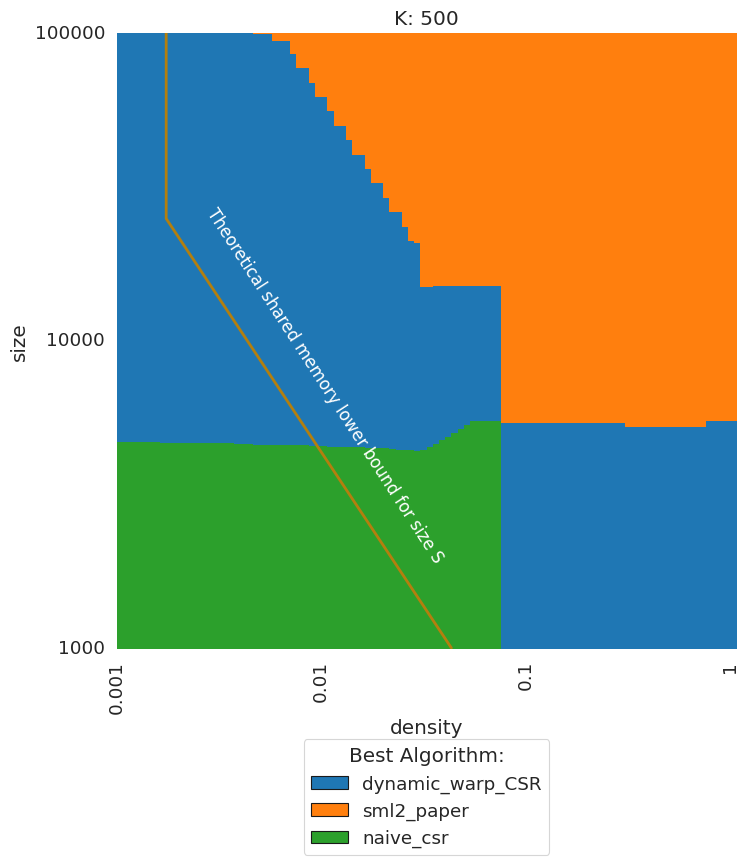

In [251]:

import seaborn as sns



# Create a pivot table for the heatmap
pivot_table = Z_pd.pivot(index='index', columns='density', values='alg')

# Create the heatmap
fig = plt.figure(figsize=(8, 8))
# colors = blue and orange, few ticks on the axes
ax = sns.heatmap(pivot_table, cmap=colors[0:num_unique_best_algos])

# ax.set_xscale('log')
# ax.set_yscale('log')

ax.set_xticks([0, 33, 66, 99])
ax.set_xticklabels([0.001, 0.01, 0.1, 1])
# ax.set_yticks([0, 200, 400, 600, 800, 999])
# ax.set_yticklabels([1, 10, 100, 1000, 10000, 100000])
ax.set_yticks([0, 500, 999])
ax.set_yticklabels([1000, 10000, 100000])

shared_mem_color = '#b37f0e'

# ax.plot(0.005, 1, 'b-', linewidth=2, label='theoretical shared memory bound')
# ax.axvline(x=17, color=shared_mem_color, linestyle='-', linewidth = 2, label='theoretical shared memory bound')
# add a line through the points (0.00172, 25000) and (0.0425, 1000) in a loglog plot with bounds (0.001, 1) and (1000, 100000)
# 0.001 is left bound, 1 is right bound, with 100 values. Since it's log scaling the value
# 0.00172 is at position -log(0.001) + log(0.00172) / (log(1) - log(0.001)) * 100 = 17.2
ax.plot([8, 8, 54], [999, 698, 1],  color=shared_mem_color, linewidth=2, label='theoretical shared memory bound for Size S')
ax.text(14,  140, 'Theoretical shared memory lower bound for size S', color = "white", fontsize=12, rotation=-57)

# flip plot horizontally
ax.invert_yaxis()

# custom legend
from matplotlib.patches import Patch
legend_elements = [Patch(facecolor=colors[i], edgecolor='k', label=num_to_alg[i]) for i in range(num_unique_best_algos)]
                    
legend = ax.legend(handles=legend_elements, loc='lower center', bbox_to_anchor=(0.5, -0.35))
legend.set_title("Best Algorithm:")
ax.set_ylabel("size")

# hide colorbar
ax.collections[0].colorbar.remove()

# add title
ax.set_title("K: 500")

# # save plot with leegnd
# plt.savefig("/scratch/eschreib/boundary_plots/K_100" + ".png", bbox_inches='tight')

# plt.savefig("/scratch/eschreib/boundary_plots/K_100" + ".eps", bbox_inches='tight')

plt.show()

# ML Stuff

In [98]:
def plot_decision_boundary(model):
    # predicts and plots the decision boundary for a given model
    # create a grid of size vs density
    x = np.linspace(0.001, 1, 100)
    y = np.linspace(1, 10000, 1000)
    X, Y = np.meshgrid(x, y)

    # plot the decision boundary
    Z = model.predict(np.c_[X.ravel(), Y.ravel()])
    Z = Z.reshape(X.shape)
    Z_pd = pd.DataFrame(Z)
    Z_pd.columns = x
    Z_pd.index = y
    Z_pd = Z_pd.reset_index()
    Z_pd = Z_pd.melt(id_vars="index", var_name="density", value_name="alg")
    Z_pd["density"] = Z_pd["density"].astype(float)

    fig = plt.figure(figsize=(10, 10))
    ax = sns.scatterplot(data=Z_pd, x="density", y="index", hue="alg")
    ax.set(xlabel="density", ylabel="k")
    plt.show()
    

# Make a dictionary to map alg names to numbers
alg_to_num = {}
num_to_alg = {}
for i, alg in enumerate(best_algs["alg"].unique()):
    alg_to_num[alg] = i
    num_to_alg[i] = alg

def map_alg_to_num(alg):
    return alg_to_num[alg]

def map_num_to_alg(num):
    return num_to_alg[num]

## Train an SVM to predict the best algorithm for a given matrix



In [103]:
# train an svm to predict the alg based on the size and density
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# split the data into train and test
best_algs_copy = best_algs.copy()   
best_algs_copy["density"] = best_algs_copy["density"].str.split("%").str[0].astype(float)
X = best_algs_copy.iloc[:, 1:3].values
y = best_algs_copy.iloc[:, 0].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

clf = svm.SVC()
# clf.fit(X_train, y_train)

# y_pred = clf.predict(X_test)
# accuracy_score(y_test, y_pred)


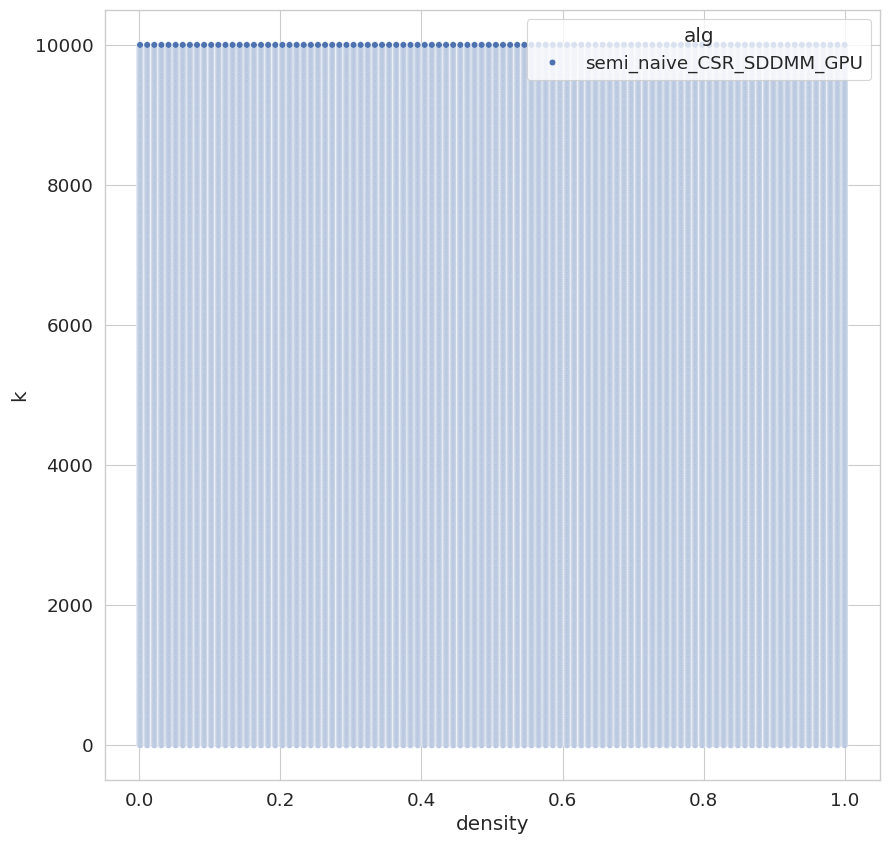

In [104]:
clf.fit(X, y)
plot_decision_boundary(clf)

## Classification tree

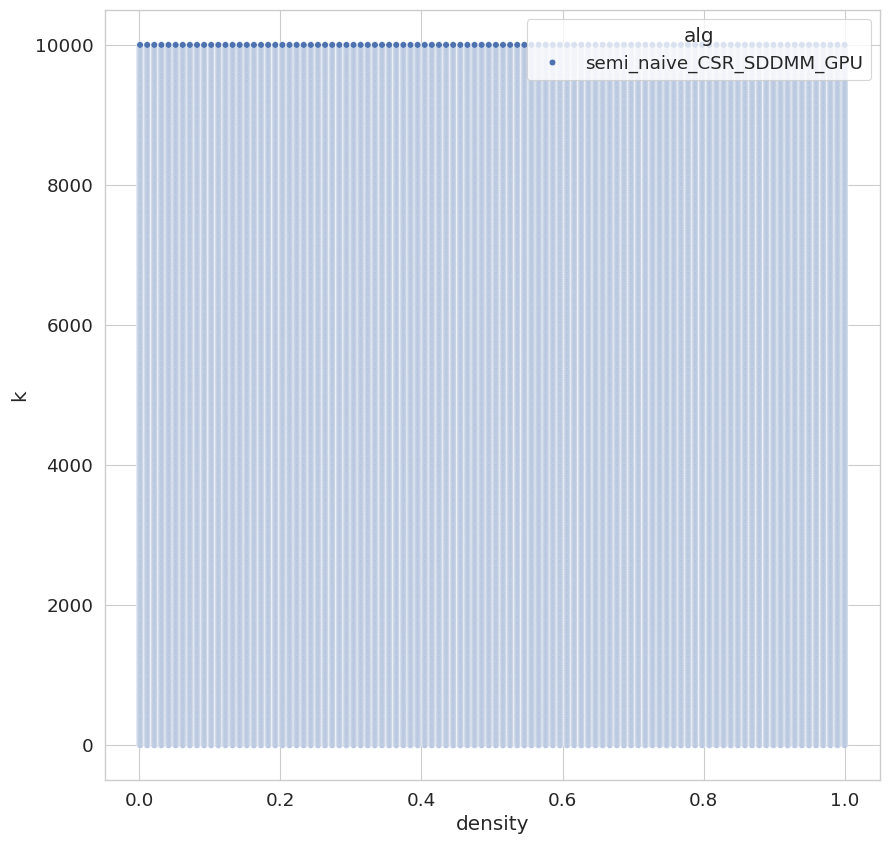

In [109]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(max_depth=2, random_state=0)
rf.fit(X, y)

# y_pred = rf.predict(X_test)
# print(f"accuracy: {accuracy_score(y_test, y_pred)}")

plot_decision_boundary(rf)

## Predict the runtimes for a given matrix

In [131]:
times_copy = times.copy()

In [132]:
# One hot encode the alg
# times_copy["alg"] = times_copy["alg"].map(alg_to_num)
times_copy = pd.get_dummies(times_copy, columns=["alg"])

# Convert the density to a float
times_copy["density"] = times_copy["density"].str.split("%").str[0].astype(float)

# Convert the size to a float
times_copy["size"] = times_copy["size"].astype(float)

# Convert the k to a int
times_copy["k"] = times_copy["k"].astype(int)

# convert time to float
times_copy["time"] = times_copy["time"].astype(float)

# Move time as the last column
times_copy = times_copy[[col for col in times_copy.columns if col != "time"] + ["time"]]

In [133]:
times_copy

,size,density,k,alg_coo_opt_loop_unrolled_SDDMM_GPU,alg_coo_opt_vectorization_SDDMM_GPU,alg_cusparse_baseline,alg_naive_coo_SDDMM_GPU,alg_semi_naive_CSR_SDDMM_GPU,time
0,10000.0,0.001,100,True,False,False,False,False,122.035197
1,10000.0,0.001,1000,True,False,False,False,False,1421.649898
2,10000.0,0.001,10000,True,False,False,False,False,15382.691822
3,10000.0,0.001,50,True,False,False,False,False,64.737280
4,10000.0,0.001,500,True,False,False,False,False,605.009928
...,...,...,...,...,...,...,...,...,...
145,10000.0,1.000,100,False,False,False,False,True,5890.268152
146,10000.0,1.000,1000,False,False,False,False,True,7927.336941
147,10000.0,1.000,10000,False,False,False,False,True,87125.104752
148,10000.0,1.000,50,False,False,False,False,True,5862.717385


In [253]:
def get_results_from_single_model(model, X, Y):
    results = []
    # plot the decision boundary
    for i, alg in enumerate(algs):
        # make general input 10k, X, Y, false, false, false, false, false
        input_ = np.c_[np.ones(X.ravel().shape[0])*10000, X.ravel(), Y.ravel(), np.zeros(X.ravel().shape[0]), np.zeros(X.ravel().shape[0]), np.zeros(X.ravel().shape[0]), np.zeros(X.ravel().shape[0]), np.zeros(X.ravel().shape[0])]
        input_[:, 3+i] = 1
        prediction_ = model.predict(input_)
        # Unravel the prediction
        prediction_ = prediction_.reshape(X.shape)
        results.append((alg, prediction_))
    return results

def get_results_from_list_of_models(models, X, Y):
    results = []
    # make general input 10k, X, Y
    input_ = np.c_[np.ones(X.ravel().shape[0])*10000, X.ravel(), Y.ravel()]
    for alg, model in models:
        prediction_ = model.predict(input_)
        # Unravel the prediction
        prediction_ = prediction_.reshape(X.shape)
        results.append((alg, prediction_))
    return results


def plot_decision_boundary_from_regressors(model):
    # predicts and plots the decision boundary for a given model
    # create a grid of size vs density
    density_ = np.linspace(0.001, 1, 100)
    k_ = np.linspace(1, 10000, 1000)
    X, Y = np.meshgrid(density_, k_)
    
    # if the model is not a list
    if not isinstance(model, list):
        results = get_results_from_single_model(model, X, Y)
    else:
        results = get_results_from_list_of_models(model, X, Y)
        

    # take the smallest prediction as the alg
    Z = np.zeros((X.shape[0], X.shape[1]))
    Z = Z.astype(str)
    for i in range(Z.shape[0]):
        for j in range(Z.shape[1]):
            # find the alg with the smallest prediction
            alg_min = "Nothing"
            min_pred = float("inf")
            for alg, pred in results:
                if pred[i][j] < min_pred:
                    alg_min = alg
                    min_pred = pred[i][j]
                    
            Z[i][j] = alg_min

    # plot the decision boundary 
    Z = Z.reshape(X.shape)
    Z_pd = pd.DataFrame(Z)
    Z_pd.columns = density_
    Z_pd.index = k_
    Z_pd = Z_pd.reset_index()
    Z_pd = Z_pd.melt(id_vars="index", var_name="density", value_name="alg")
    Z_pd["density"] = Z_pd["density"].astype(float)

    fig = plt.figure(figsize=(10, 10))
    ax = sns.scatterplot(data=Z_pd, x="density", y="index", hue="alg")
    ax.set(xlabel="density", ylabel="k")
    plt.show()

### SVM

In [227]:
# Predict the runtime for each alg, density and k using a kernelized svm
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

# split the data into train and test
X = times_copy.iloc[:, :-1].values
y = times_copy.iloc[:, -1].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

svr = SVR(kernel="rbf")
svr.fit(X_train, y_train)

y_pred = svr.predict(X_test)
print(f"mse: {mean_squared_error(y_test, y_pred)}")
print(f"mae: {mean_absolute_error(y_test, y_pred)}")
print(f"r2: {r2_score(y_test, y_pred)}")

mse: 44700926449.74934
mae: 55820.465897168426
r2: -0.07377501364397854


### Random Forest Regressor

In [216]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(max_depth=4, random_state=0)
rf.fit(X_train, y_train)

y_pred = rf.predict(X_test)
print(f"mse: {mean_squared_error(y_test, y_pred)}")
print(f"mae: {mean_absolute_error(y_test, y_pred)}")
print(f"r2: {r2_score(y_test, y_pred)}")

mse: 2403228386.918204
mae: 18517.076591459765
r2: 0.9422712950512648


### Linear Regression


In [127]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train, y_train)

y_pred = lr.predict(X_test)
print(f"mse: {mean_squared_error(y_test, y_pred)}")
print(f"mae: {mean_absolute_error(y_test, y_pred)}")
print(f"r2: {r2_score(y_test, y_pred)}")

mse: 14606941893.740063
mae: 94198.36539483153
r2: -0.16786861196293112


### Kernel Ridge Regression

In [128]:
# Kernelized ridge regression
from sklearn.kernel_ridge import KernelRidge
kr = KernelRidge(alpha=1.0)
kr.fit(X_train, y_train)

y_pred = kr.predict(X_test)
print(f"mse: {mean_squared_error(y_test, y_pred)}")
print(f"mae: {mean_absolute_error(y_test, y_pred)}")
print(f"r2: {r2_score(y_test, y_pred)}")


mse: 13793156935.627157
mae: 90339.50256061107
r2: -0.10280407508851974


### AdaBoost Regressor

In [129]:
# Ada boost
from sklearn.ensemble import AdaBoostRegressor
ada = AdaBoostRegressor(n_estimators=100, random_state=0)
ada.fit(X_train, y_train)

y_pred = ada.predict(X_test)
print(f"mse: {mean_squared_error(y_test, y_pred)}")
print(f"mae: {mean_absolute_error(y_test, y_pred)}")
print(f"r2: {r2_score(y_test, y_pred)}")


mse: 888569084.3523418
mae: 14830.488911472588
r2: 0.9289562489722458


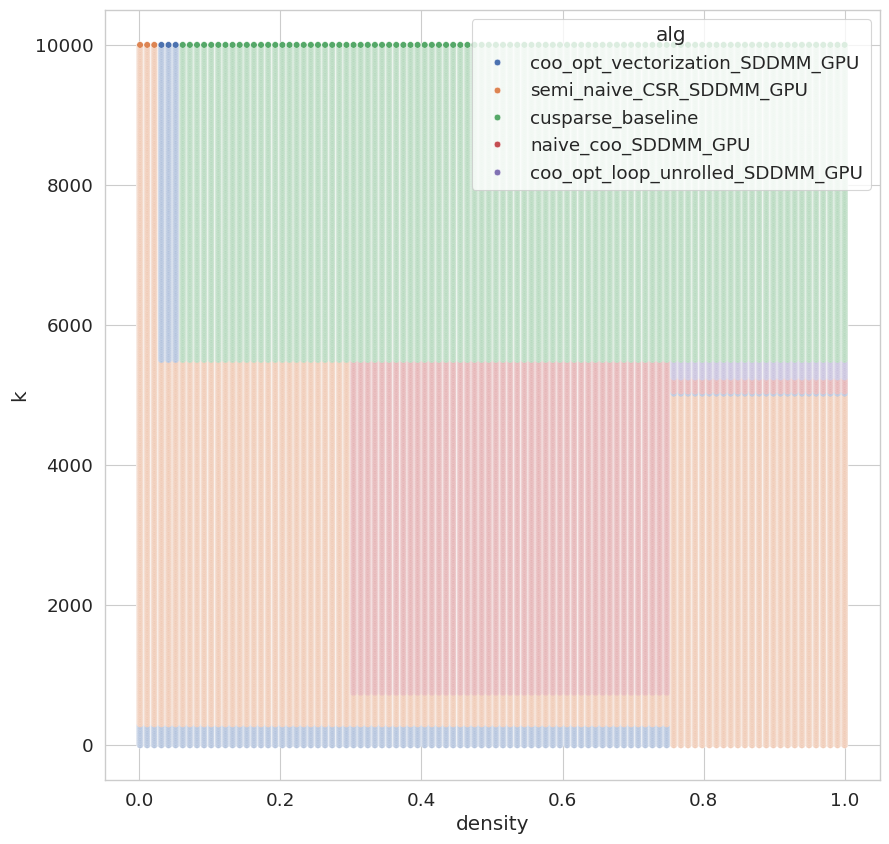

In [226]:
plot_decision_boundary_from_regressors(ada)

## Make a model for each algorithm


In [238]:
def train_model_for_each_alg(times_copy, modelType):
    models_dict = {}
    for alg in algs:
        svr = modelType
        models_dict[alg] = svr

    data_list = [] # alg, X, y
    for alg in algs:
        data_list.append((alg, times_copy[times_copy["alg_"+alg] == 1].iloc[:, :3].values, times_copy[times_copy["alg_"+alg] == 1].iloc[:, -1].values))

    models = []
    Scores = []
    for alg, X, y in data_list:
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
        
        model = models_dict[alg]
        model.fit(X_train, y_train)
        models.append((alg, model))
        
        y_pred = model.predict(X_test)
        
        Scores.append((alg, mean_squared_error(y_test, y_pred), mean_absolute_error(y_test, y_pred), r2_score(y_test, y_pred)))

    for alg, mse, mae, r2 in Scores:
        print(f"{alg}: mse: {mse}, mae: {mae}, r2: {r2}")

    print(f"mean mse: {np.mean([mse for alg, mse, mae, r2 in Scores])}")
    print(f"mean mae: {np.mean([mae for alg, mse, mae, r2 in Scores])}")
    print(f"mean r2: {np.mean([r2 for alg, mse, mae, r2 in Scores])}")

    return models


### SVR

In [240]:
# Predict the runtime for each alg, density and k using a kernelized svm
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

models_svr = train_model_for_each_alg(times_copy, SVR(kernel="rbf"))



coo_opt_loop_unrolled_SDDMM_GPU: mse: 147664864751.39133, mae: 132301.6778784029, r2: -0.132068997942697
coo_opt_vectorization_SDDMM_GPU: mse: 130317433612.68771, mae: 122032.92228667854, r2: -0.12736875870416342
cusparse_baseline: mse: 110747912437.27742, mae: 127360.67901983931, r2: -0.16809424629021574
naive_coo_SDDMM_GPU: mse: 144612537540.2034, mae: 130809.95815354658, r2: -0.13187947724495475
semi_naive_CSR_SDDMM_GPU: mse: 762547944.3009678, mae: 11088.429946210397, r2: -0.18124414424259605
mean mse: 106821059257.17215
mean mae: 104718.73345693556
mean r2: -0.14813112488492539


### Random Forest Regressor

In [241]:
from sklearn.ensemble import RandomForestRegressor
models_rf = train_model_for_each_alg(times_copy, RandomForestRegressor(max_depth=4, random_state=0))

coo_opt_loop_unrolled_SDDMM_GPU: mse: 70785292492.122, mae: 88856.11870610504, r2: 0.4573263228490363
coo_opt_vectorization_SDDMM_GPU: mse: 63525999445.74026, mae: 83945.74374766312, r2: 0.4504401663292661
cusparse_baseline: mse: 42095989303.58947, mae: 80602.46684836826, r2: 0.555999911734082
naive_coo_SDDMM_GPU: mse: 69431776172.83829, mae: 87931.64411022249, r2: 0.4565588582051351
semi_naive_CSR_SDDMM_GPU: mse: 371022633.66929084, mae: 7552.345787244894, r2: 0.42525802255610456
mean mse: 49242016009.59186
mean mae: 69777.66383992076
mean r2: 0.46911665633472477


### Linear Regression

In [242]:
from sklearn.linear_model import LinearRegression
models_lr = train_model_for_each_alg(times_copy, LinearRegression())

coo_opt_loop_unrolled_SDDMM_GPU: mse: 91687369004.00714, mae: 141915.02363335743, r2: 0.29708107526377114
coo_opt_vectorization_SDDMM_GPU: mse: 82572810343.12521, mae: 134830.59773117842, r2: 0.2856672808957148
cusparse_baseline: mse: 57492703590.903854, mae: 114148.96842679425, r2: 0.3936057593298814
naive_coo_SDDMM_GPU: mse: 89889030192.19522, mae: 140520.45834347367, r2: 0.2964403347412917
semi_naive_CSR_SDDMM_GPU: mse: 401860046.7129736, mae: 8954.014054520123, r2: 0.3774885493660183
mean mse: 64408754635.38888
mean mae: 108073.81243786479
mean r2: 0.3300565999193355


### Kernel Ridge Regression

In [243]:
from sklearn.kernel_ridge import KernelRidge
models_kr = train_model_for_each_alg(times_copy, KernelRidge(alpha=1.0))

coo_opt_loop_unrolled_SDDMM_GPU: mse: 95435245700.10883, mae: 139085.5046999268, r2: 0.2683480721698266
coo_opt_vectorization_SDDMM_GPU: mse: 85939211868.72305, mae: 132152.4474749006, r2: 0.25654473141018286
cusparse_baseline: mse: 60960364521.060135, mae: 110702.54737947066, r2: 0.3570312118602398
naive_coo_SDDMM_GPU: mse: 93543670689.03745, mae: 137735.18678045046, r2: 0.2678355357007245
semi_naive_CSR_SDDMM_GPU: mse: 436540586.67632073, mae: 8568.01571811584, r2: 0.3237657833982611
mean mse: 67263006673.121155
mean mae: 105648.74041057288
mean r2: 0.294705066907847


### AdaBoost Regressor

In [244]:
from sklearn.ensemble import AdaBoostRegressor
models_ada = train_model_for_each_alg(times_copy, AdaBoostRegressor(n_estimators=100, random_state=0))

coo_opt_loop_unrolled_SDDMM_GPU: mse: 37790153079.64823, mae: 69000.86208604652, r2: 0.7102827351583958
coo_opt_vectorization_SDDMM_GPU: mse: 34668659424.80647, mae: 65338.661745991536, r2: 0.7000833851759016
cusparse_baseline: mse: 19417069294.584503, mae: 61840.89496630799, r2: 0.7952018559657452
naive_coo_SDDMM_GPU: mse: 36977925694.81462, mae: 68041.2635088824, r2: 0.7105745053853739
semi_naive_CSR_SDDMM_GPU: mse: 195176884.4278452, mae: 5579.55373587275, r2: 0.6976563197829428
mean mse: 25809796875.656334
mean mae: 53960.24720862023
mean r2: 0.7227597602936718


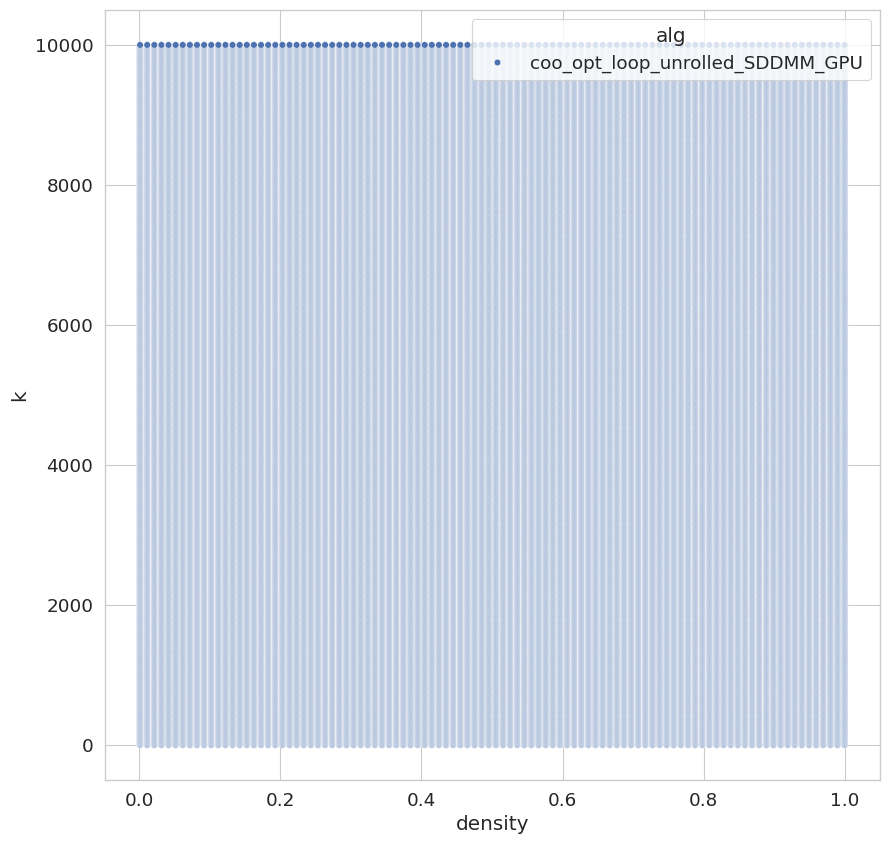

In [260]:
plot_decision_boundary_from_regressors(models_ada)

# 3D Plot

In [11]:
# take all algs
algs = data[0].unique()
sizes = data[1].unique()
times = [] # Alg, size, density, k, mean_time
# for each alg take all runs with size 10000x10000 and make the mean
for size in sizes:
    for alg in algs:
        alg_data = data[data[0] == alg]
        alg_data = alg_data[alg_data[1] == size]
        alg_data = alg_data.groupby([0, 1, 2, 3]).mean()
        alg_data = alg_data.reset_index()
        for i in range(alg_data.shape[0]):
            times.append([alg_data.iloc[i, 0], alg_data.iloc[i, 1], alg_data.iloc[i, 2], alg_data.iloc[i, 3], alg_data.iloc[i, 4]])

for time in times:
    time[1] = int(time[1].split("x")[0])
    time[2] = to_percent(time[2])
    time[3] = int(time[3])
    time[4] = time[4] / 1000 # convert to ms


times = pd.DataFrame(times)
times.columns = ["alg", "size", "density", "k", "time"]
times

,alg,size,density,k,time
0,coo_opt_loop_unrolled_SDDMM_GPU,20000,0.001%,100,128.430083
1,coo_opt_loop_unrolled_SDDMM_GPU,20000,0.001%,1000,1521.541142
2,coo_opt_loop_unrolled_SDDMM_GPU,20000,0.001%,20000,33411.911678
3,coo_opt_loop_unrolled_SDDMM_GPU,20000,0.001%,50,67.696641
4,coo_opt_loop_unrolled_SDDMM_GPU,20000,0.001%,500,749.122556
...,...,...,...,...,...
534,semi_naive_CSR_SDDMM_GPU,24696,0.096%,100,3632.445279
535,semi_naive_CSR_SDDMM_GPU,24696,0.096%,1000,4336.327524
536,semi_naive_CSR_SDDMM_GPU,24696,0.096%,24696,139030.144348
537,semi_naive_CSR_SDDMM_GPU,24696,0.096%,50,3565.747193


In [12]:
# for each density and k keep the alg with the lowest runtime
best_algs = []
for k in times["k"].unique():
    for density in times["density"].unique():
        sub_data = times[times["k"] == k]
        sub_data = sub_data[sub_data["density"] == density]
        best_alg = sub_data[sub_data["time"] == sub_data["time"].min()]
        best_algs.append(best_alg)

best_algs = pd.concat(best_algs, axis=0)
best_algs = best_algs.reset_index()
best_algs = best_algs.drop(best_algs.columns[0], axis=1)
best_algs

,alg,size,density,k,time
0,cusparse_baseline,1000,0.001%,100,8.898880
1,cusparse_baseline,1000,0.01%,100,9.578880
2,semi_naive_CSR_SDDMM_GPU,1000,0.05%,100,12.149760
3,cusparse_baseline,1000,0.1%,100,14.324960
4,cusparse_baseline,1000,0.5%,100,19.837760
5,cusparse_baseline,1000,1%,100,26.303360
6,coo_opt_vectorization_SDDMM_GPU,23670,0.046%,100,181.652478
7,cusparse_baseline,25710,0.56%,100,848.015374
8,cusparse_baseline,24696,0.096%,100,222.576636
9,semi_naive_CSR_SDDMM_GPU,1000,0.001%,1000,9.556480


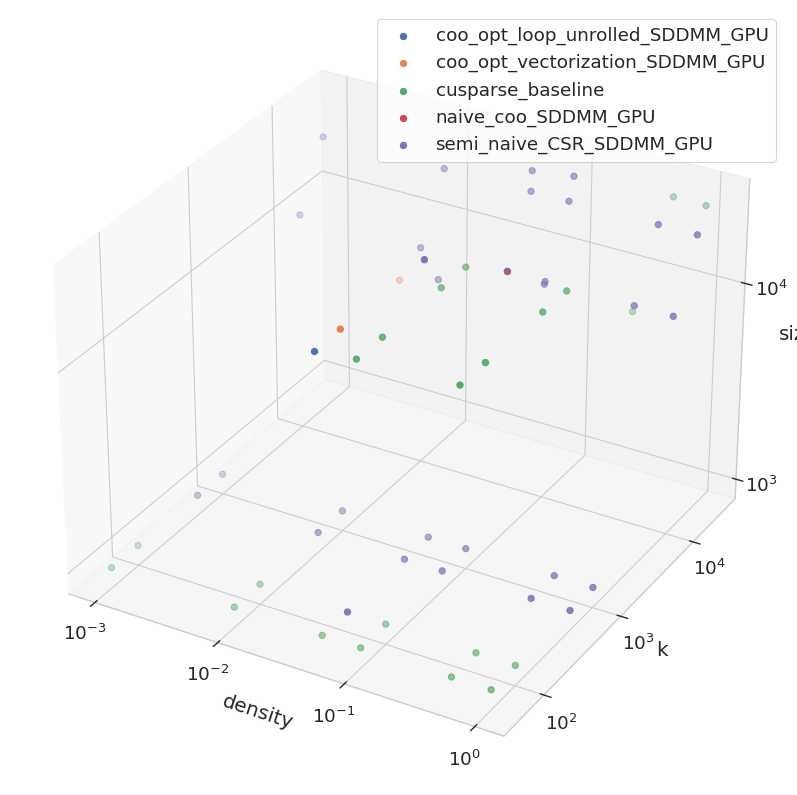

In [13]:
# %matplotlib widget
# make a 3d plot of size vs density vs k
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
from matplotlib.colors import ListedColormap
import matplotlib.ticker as mticker
import numpy as np

# My axis should display 10⁻¹ but you can switch to e-notation 1.00e+01
def log_tick_formatter(val, pos=None):
    return f"$10^{{{int(val)}}}$"  # remove int() if you don't use MaxNLocator
    # return f"{10**val:.2e}"      # e-Notation




# make cmap for best_algs["alg"]
cmap_alg = {}
# give each alg a unique color
for i, alg in enumerate(best_algs["alg"].unique()):
    cmap_alg[alg] = i

color_legend = []
for alg, color in cmap_alg.items():
    color_legend.append((alg, color))



fig = plt.figure(figsize=(10, 30))
plot_axes = plt.axes(projection = '3d')
for alg in algs:
    plot_axes.scatter3D(np.log10(best_algs[best_algs["alg"] == alg]["density"].str.split("%").str[0].astype(float)), 
                        np.log10(best_algs[best_algs["alg"] == alg]["k"]), 
                        np.log10(best_algs[best_algs["alg"] == alg]["size"]), 
                        # c=best_alg[best_alg["alg"] == alg]["alg"].map(cmap_alg),
                        # cmap=ListedColormap(sns.color_palette(n_colors=len(best_algs["alg"].unique()))), 
                        label=alg)
# plot_axes.scatter3D(best_algs["density"].str.split("%").str[0].astype(float), best_algs["k"], best_algs["size"], c=best_algs["alg"].map(cmap_alg), cmap=ListedColormap(sns.color_palette(n_colors=len(best_algs["alg"].unique()))))
plot_axes.set_xlabel("density")
plot_axes.set_ylabel("k")
plot_axes.set_zlabel("size")
plot_axes.xaxis.set_major_formatter(mticker.FuncFormatter(log_tick_formatter))
plot_axes.xaxis.set_major_locator(mticker.MaxNLocator(integer=True))
plot_axes.yaxis.set_major_formatter(mticker.FuncFormatter(log_tick_formatter))
plot_axes.yaxis.set_major_locator(mticker.MaxNLocator(integer=True))
plot_axes.zaxis.set_major_formatter(mticker.FuncFormatter(log_tick_formatter))
plot_axes.zaxis.set_major_locator(mticker.MaxNLocator(integer=True))
plot_axes.legend()
plt.show()


In [14]:
# Interpolate the data to get a smooth surface
from scipy.interpolate import griddata
import numpy as np

# create a grid of size vs density
# x = np.linspace(0.001, 1, 100)
# y = np.linspace(1, 10000, 1000)
x = np.logspace(-3, 0, 100)
y = np.logspace(0, 4, 1000)
z = np.logspace(0, 4, 1000)
X, Y, Z = np.meshgrid(x, y, z)

# interpolate the data
Z = griddata((best_algs["density"].str.split("%").str[0].astype(float), best_algs["k"], best_algs["size"]), best_algs["alg"], (X, Y, Z), method='nearest')

# Make a dictionary to map alg names to numbers
alg_to_num = {}
num_to_alg = {}
for i, alg in enumerate(best_algs["alg"].unique()):
    alg_to_num[alg] = i
    num_to_alg[i] = alg

# map the alg names to numbers in Z
for i in range(Z.shape[0]):
    for j in range(Z.shape[1]):
        for k in range(Z.shape[2]):
            Z[i][j][k] = float(alg_to_num[Z[i][j][k]])



In [28]:
Z_np = np.array(Z.astype(int))
# type int 16
Z_np = Z_np.astype(np.int16)

In [29]:
# Save Z_np to an nifti file
import nibabel as nib
output_dir = "/scratch/eschreib/plots/plot_gen/eric_gen"

img = nib.Nifti1Image(Z_np, np.eye(4))
nib.save(img, output_dir + "/best_alg_3d.nii.gz")

In [24]:
# export the data to an nrrd file
import nrrd
output_dir = "/scratch/eschreib/plots/plot_gen/eric_gen"
header = {"encoding": "gzip"}
nrrd.write(output_dir + "/best_alg.nrrd", Z_np, index_order="C",
              header=header)

TypeError: ufunc 'isnan' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

In [ ]:
# print the alg to num mapping
print(alg_to_num)

{'cusparse_baseline': 0, 'semi_naive_CSR_SDDMM_GPU': 1, 'coo_opt_vectorization_SDDMM_GPU': 2, 'coo_opt_loop_unrolled_SDDMM_GPU': 3, 'naive_coo_SDDMM_GPU': 4}
